In [9]:
### code to generate the data set
import pdb
import numpy as np
import pandas as pd

In [10]:
## membership status
years      = ['2014', '2015', '2016', '2017', '2018']
userStatus = ['bronze', 'silver', 'gold', 'inactive']

userYears = np.random.choice(years, 1000, p = [0.1, 0.1, 0.15, 0.30, 0.35])
userStats = np.random.choice(userStatus, 1000, p = [0.5, 0.3, 0.1, 0.1])

yearJoined = pd.DataFrame({'yearJoined': userYears,
                           'userStats': userStats})

In [11]:
## email behavior
NUM_EMAILS_SENT_WEEKLY = 3

In [12]:
## types of behavior
def never_opens(period_rng):
    return []

def constant_open_rate(period_rng):
    n, p = NUM_EMAILS_SENT_WEEKLY, np.random.uniform(0, 1)
    num_opened = np.random.binomial(n, p, len(period_rng))
    return num_opened

def open_rate_with_factor_change(period_rng, fac):

    if len(period_rng) < 1 :
        return []
    
    times = np.random.randint(0, len(period_rng), int(0.1 * len(period_rng)))
    try:
        n, p = NUM_EMAILS_SENT_WEEKLY, np.random.uniform(0, 1)
        num_opened = np.zeros(len(period_rng))
        for pd in range(0, len(period_rng), 2):        
            num_opened[pd:(pd + 2)] = np.random.binomial(n, p, 2)
            p = max(min(1, p * fac), 0)
    except:
        num_opened[pd] = np.random.binomial(n, p, 1)
    for t in times:
        num_opened[t] = 0
    return num_opened

def increasing_open_rate(period_rng):
    return open_rate_with_factor_change(period_rng, np.random.uniform(1.01, 1.30))
    
def decreasing_open_rate(period_rng):
    return open_rate_with_factor_change(period_rng, np.random.uniform(0.5, 0.99))

In [13]:
def random_weekly_time_delta():
    days_of_week = [d for d in range(7)]
    hours_of_day = [h for h in range(11, 23)]
    minute_of_hour = [m for m in range(60)]
    second_of_minute = [s for s in range(60)]
    return pd.Timedelta(str(np.random.choice(days_of_week))     + " days" )   + \
           pd.Timedelta(str(np.random.choice(hours_of_day))     + " hours" )  + \
           pd.Timedelta(str(np.random.choice(minute_of_hour))   + " minutes") + \
           pd.Timedelta(str(np.random.choice(second_of_minute)) + " seconds")
    

In [18]:
## donation behavior
def produce_donations(period_rng, user_behavior, num_emails, use_id, user_join_year):
    donation_amounts = np.array([0, 25, 50, 75, 100, 250, 500, 1000, 1500, 2000])
    user_has = np.random.choice(donation_amounts)
        
    user_gives = num_emails  / (NUM_EMAILS_SENT_WEEKLY * len(period_rng)) * user_has
    user_gives_idx = np.where(user_gives >= donation_amounts)[0][-1]
    
    user_gives_idx = max(min(user_gives_idx, len(donation_amounts) - 2), 1)
    
    num_times_gave = np.random.poisson(2) * (2018 - user_join_year)
    
    times = np.random.randint(0, len(period_rng), num_times_gave)

    donations = pd.DataFrame({'user': [], 'amount': [], 'timestamp': []})
    for n in range(num_times_gave):
        
        donations = pd.concat([donations, pd.DataFrame({'user': [use_id],
                                       'amount': [donation_amounts[user_gives_idx + \
                                                  np.random.binomial(1, .3)]], 
                                       'timestamp': [str(period_rng[times[n]].start_time + random_weekly_time_delta())]})])

    if donations.shape[0] > 0:
        donations = donations[donations.amount != 0]
    return donations

In [19]:
## run it
behaviors = [never_opens, constant_open_rate, increasing_open_rate, decreasing_open_rate]
user_behaviors = np.random.choice(behaviors, 1000, [0.2, 0.5, 0.1, 0.2])

In [20]:
rng = pd.period_range('2015-02-14', '2018-06-01', freq = 'W')
emails = pd.DataFrame({'user': [], 'week': [], 'emailsOpened':[]})
donations = pd.DataFrame({'user': [], 'amount': [], 'timestamp': []})

In [21]:
for idx in range(yearJoined.shape[0]):
    ## randomly generate the date when a user would have joined
    join_date = pd.Timestamp(yearJoined.iloc[idx].yearJoined) + \
                pd.Timedelta(str(np.random.randint(0, 365)) + ' days')
    join_date = min(join_date, pd.Timestamp('2018-06-01'))
    
    ## user should not receive emails or make donations before joining
    ## thank you to Murray M Gillin for reporting errata and suggesting this correction
    user_rng = rng[rng.start_time > join_date]    
    
    if len(user_rng) < 1:
        continue

    info = user_behaviors[idx](user_rng)

    if len(info) == len(user_rng):
        emails = pd.concat([emails, pd.DataFrame({'user': [idx] * len(info),
                                    'week': [str(r.start_time) for r in user_rng],
                                    'emailsOpened': info})])

    donations = pd.concat([donations, produce_donations(user_rng, user_behaviors[idx],
                                                    sum(info), idx, join_date.year)])

141.85750636132315 250 4
140.35087719298244 1000 4
0.0 75 0
6.25 25 0
0.0 0 0
0.0 2000 0
48.03921568627451 50 1
0.0 1000 0
0.0 50 0
0.0 0 0
18.410852713178294 25 0
0.0 1500 0
302.020202020202 500 5
0.0 100 0
86.95652173913044 100 3
0.0 0 0
700.0 1000 6
226.7441860465116 250 4
16.666666666666664 25 0
0.641025641025641 25 0
64.91228070175438 75 2
0.0 0 0
0.0 0 0
1488.262910798122 2000 7
198.4126984126984 500 4
2.9166666666666665 75 0
0.0 1000 0
1666.6666666666667 2000 8
4.872881355932203 75 0
0.0 25 0
0.0 0 0
5.426356589147287 100 0
5.128205128205128 25 0
5.555555555555555 50 0
0.0 2000 0
0.0 100 0
0.0 50 0
0.0 25 0
153.921568627451 250 4
0.6134969325153374 50 0
0.0 25 0
27.777777777777775 500 1
4.040404040404041 100 0
34.59119496855346 500 1
3.125 25 0
20.289855072463766 500 0
0.0 100 0
125.0 250 4
23.497267759562842 50 0
75.0 75 3
428.57142857142856 1000 5
141.6184971098266 250 4
0.0 1000 0
0.0 75 0
50.505050505050505 1000 2
55.55555555555555 75 2
22.387005649717516 25 0
0.0 500 0
0.0 

<AxesSubplot:xlabel='timestamp'>

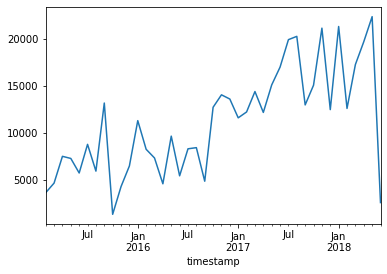

In [22]:
donations.set_index(pd.to_datetime(donations.timestamp), inplace=True)
donations.sort_index(inplace=True)
donations.groupby(pd.Grouper(freq='M')).amount.sum().plot()

In [57]:
## get rid of zero donations and zero emails
emails = emails[emails.emailsOpened != 0]
yearJoined.index.name = 'user'

yearJoined.to_csv('data/year_joined.csv', index = False)
donations.to_csv( 'data/donations.csv',   index = False)
emails.to_csv(    'data/emails.csv',      index = False)

In [62]:
yearJoined.groupby('user').count().groupby('userStats').count()

,yearJoined
userStats,
1,1000


In [63]:
emails

,user,week,emailsOpened
4,2.0,2016-06-27 00:00:00,2.0
17,2.0,2016-09-26 00:00:00,1.0
21,2.0,2016-10-24 00:00:00,1.0
28,2.0,2016-12-12 00:00:00,1.0
35,2.0,2017-01-30 00:00:00,1.0
...,...,...,...
47,998.0,2018-04-30 00:00:00,3.0
48,998.0,2018-05-07 00:00:00,3.0
49,998.0,2018-05-14 00:00:00,3.0
50,998.0,2018-05-21 00:00:00,3.0


In [64]:
emails[emails.emailsOpened < 1]

,user,week,emailsOpened


In [65]:
emails.week = pd.to_datetime(emails.week)

In [68]:
(max(emails[emails.user == 998].week) - min(emails[emails.user == 998].week)).days / 7

50.0

In [71]:
emails[emails.user == 998].shape

(41, 3)

In [72]:
complete_idx = pd.MultiIndex.from_product((set(emails.user), set(emails.week)))

In [73]:
all_email = emails.set_index(['user', 'week']).reindex(complete_idx, fill_value = 0).reset_index()

In [75]:
all_email.columns = ['user', 'week', 'emailsOpened']

In [76]:
all_email

,user,week,emailsOpened
0,2.0,2016-04-11,0.0
1,2.0,2015-06-15,0.0
2,2.0,2015-05-11,0.0
3,2.0,2015-10-05,0.0
4,2.0,2018-04-16,0.0
...,...,...,...
99816,998.0,2016-10-31,0.0
99817,998.0,2016-11-07,0.0
99818,998.0,2016-10-24,0.0
99819,998.0,2016-01-18,0.0


In [77]:
all_email[all_email.user == 998].sort_values('week')

,user,week,emailsOpened
99815,998.0,2015-02-09,0.0
99663,998.0,2015-02-16,0.0
99794,998.0,2015-02-23,0.0
99803,998.0,2015-03-02,0.0
99711,998.0,2015-03-09,0.0
...,...,...,...
99773,998.0,2018-04-30,3.0
99727,998.0,2018-05-07,3.0
99755,998.0,2018-05-14,3.0
99715,998.0,2018-05-21,3.0


In [78]:
cutoff_dates = emails.groupby('user').week.agg(['min', 'max']).reset_index()

In [79]:
cutoff_dates

,user,min,max
0,2.0,2016-06-27,2018-02-19
1,3.0,2015-02-09,2018-05-28
2,4.0,2018-05-21,2018-05-28
3,11.0,2016-11-07,2018-04-16
4,12.0,2016-03-21,2016-04-25
...,...,...,...
572,993.0,2015-02-16,2018-05-28
573,995.0,2017-04-17,2018-05-28
574,996.0,2016-02-01,2018-05-28
575,997.0,2017-08-21,2018-05-28


In [83]:
for _, row in cutoff_dates.iterrows():
    user = row['user']
    start_date = row['min']
    end_date = row['max']
    all_email.drop(all_email[all_email.user == user][all_email.week < start_date].index, inplace=True)
    all_email.drop(all_email[all_email.user == user][all_email.week > end_date].index, inplace=True)

/tmp/ipykernel_2033503/3683796562.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[all_email.user == user][all_email.week < start_date].index, inplace=True)
/tmp/ipykernel_2033503/3683796562.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_email.drop(all_email[all_email.user == user][all_email.week > end_date].index, inplace=True)


In [84]:
all_email

,user,week,emailsOpened
9,2.0,2017-04-10,0.0
10,2.0,2016-06-27,2.0
11,2.0,2016-12-12,1.0
13,2.0,2017-01-16,0.0
14,2.0,2016-09-05,0.0
...,...,...,...
99804,998.0,2017-06-19,0.0
99809,998.0,2017-07-24,2.0
99812,998.0,2018-04-23,3.0
99814,998.0,2017-07-10,0.0


# Constructing a Found Time Series

In [85]:
donations.timestamp = pd.to_datetime(donations.timestamp)
all_email.timestamp = pd.to_datetime(all_email.week)

/tmp/ipykernel_2033503/372853178.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  all_email.timestamp = pd.to_datetime(all_email.week)


In [86]:
donations

,user,amount,timestamp
0,0.0,50.0,2018-02-14 18:47:34
0,0.0,25.0,2017-12-23 20:20:27
0,0.0,25.0,2016-03-06 21:02:17
0,0.0,25.0,2017-11-28 14:01:35
0,0.0,25.0,2017-12-27 11:44:32
...,...,...,...
0,997.0,500.0,2018-05-24 16:32:32
0,997.0,1000.0,2017-11-10 20:20:53
0,998.0,1500.0,2018-01-07 11:28:16
0,998.0,1000.0,2017-11-12 18:57:35


In [87]:
donations.set_index('timestamp', inplace=True)

In [88]:
donations

,user,amount
timestamp,,
2018-02-14 18:47:34,0.0,50.0
2017-12-23 20:20:27,0.0,25.0
2016-03-06 21:02:17,0.0,25.0
2017-11-28 14:01:35,0.0,25.0
2017-12-27 11:44:32,0.0,25.0
...,...,...
2018-05-24 16:32:32,997.0,500.0
2017-11-10 20:20:53,997.0,1000.0
2018-01-07 11:28:16,998.0,1500.0


In [89]:
agg_don = donations.groupby('user').apply(lambda df: df.amount.resample("W-MON").sum().dropna()).reset_index()

In [90]:
agg_don

,user,timestamp,amount
0,0.0,2015-12-28,25.0
1,0.0,2016-01-04,0.0
2,0.0,2016-01-11,0.0
3,0.0,2016-01-18,0.0
4,0.0,2016-01-25,0.0
...,...,...,...
32354,998.0,2017-12-11,0.0
32355,998.0,2017-12-18,0.0
32356,998.0,2017-12-25,0.0
32357,998.0,2018-01-01,0.0


In [91]:
merged_df = pd.DataFrame()

for user, user_email in all_email.groupby('user'):
    user_donations = agg_don[agg_don.user == user]
    
    user_donations.set_index('timestamp', inplace=True)
    #user_email.set_index('week', inplace=True)
    
    user_email = all_email[all_email.user == user]
    user_email.sort_values('week', inplace=True)
    user_email.set_index('week', inplace=True)
    
    df = pd.merge(user_email, user_donations, how='left', left_index=True, right_index=True)
    df.fillna(0)
    df['user'] = df.user_x
    merged_df = pd.concat([merged_df, df.reset_index()])[['user', 'week', 'emailsOpened', 'amount']]

/tmp/ipykernel_2033503/146442273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_email.sort_values('week', inplace=True)
/tmp/ipykernel_2033503/146442273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_email.sort_values('week', inplace=True)
/tmp/ipykernel_2033503/146442273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_email.sort_values('week', inplace=True)
/tmp/ipykernel_2033503/146442273.py:10: Settin

In [92]:
merged_df

,user,week,emailsOpened,amount
0,2.0,2016-06-27,2.0,0.0
1,2.0,2016-07-04,0.0,0.0
2,2.0,2016-07-11,0.0,0.0
3,2.0,2016-07-18,0.0,0.0
4,2.0,2016-07-25,0.0,0.0
...,...,...,...,...
46,998.0,2018-04-30,3.0,NaN
47,998.0,2018-05-07,3.0,NaN
48,998.0,2018-05-14,3.0,NaN
49,998.0,2018-05-21,3.0,NaN


In [93]:
df = merged_df[merged_df.user == 998]
df['target'] = df.amount.shift(1)
df = df.fillna(0)
df[-50:]

/tmp/ipykernel_2033503/1611889411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df.amount.shift(1)


,user,week,emailsOpened,amount,target
1,998.0,2017-06-19,0.0,0.0,0.0
2,998.0,2017-06-26,0.0,0.0,0.0
3,998.0,2017-07-03,0.0,0.0,0.0
4,998.0,2017-07-10,0.0,0.0,0.0
5,998.0,2017-07-17,2.0,0.0,0.0
6,998.0,2017-07-24,2.0,0.0,0.0
7,998.0,2017-07-31,0.0,0.0,0.0
8,998.0,2017-08-07,1.0,0.0,0.0
9,998.0,2017-08-14,1.0,0.0,0.0
10,998.0,2017-08-21,0.0,0.0,0.0
